# 5. EfficientNET

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import mlflow
from mlflow.models.signature import infer_signature
mlflow.set_experiment('Projeto Aplicado XPE - Detector de Deep Fake')
#from facenet_pytorch import MTCNN
#from PIL import Image
#import moviepy.editor as mp
#import os
#import zipfile


In [2]:
model = tf.keras.models.load_model("../src/models/FINAL-EFFICIENTNETV2-B0")

### celebdf

In [3]:
# dataframe
dataset = 'celebdf'
dataframe_faces= pd.read_csv('../data/processed/dataset_'+dataset+'/metadados_faces.csv', sep=';', dtype=str)
dataframe_faces_teste = dataframe_faces[dataframe_faces['particao']=='teste'].reset_index(drop=True)
# Preparação da imagem

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_dataframe(
    dataframe_faces_teste,
    x_col='face',
    y_col='label',
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary')

Found 17601 validated image filenames belonging to 2 classes.


Actual label: 0
predição: [0.72615695 0.27384305]

Correct prediction: True


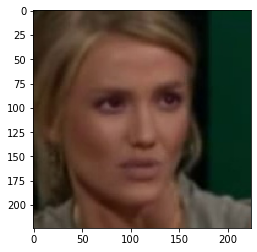

In [4]:
# teste
# Rendering image X with label y for MesoNet
X, y = generator.next()
# Evaluating prediction
#print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
#face = cv2.resize(X[0], (224, 224))
face2 = X[0]/255
pred = model.predict(np.expand_dims(face2, axis=0))[0]
print(f"Actual label: {int(y[0])}")
print("predição:", pred)
print(f"\nCorrect prediction: {round(pred[1])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

In [5]:
test_x =[]
test_y = []
test_pred = []
test_pred_label = []
for i in range(len(generator.labels)):  
#for i in range(5000):  
    # Loading next picture, generating prediction
    try:
        # Rendering image X with label y for MesoNet
        X, y = generator.next()
        # Evaluating prediction
        #print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
        face2 = X[0]/255
        pred = model.predict(np.expand_dims(face2, axis=0))[0]
        test_x.append(X)
        test_y.append(round(y[0]))
        test_pred.append(pred[1])
        test_pred_label.append(round(pred[1]))
    except:
        pass

resultados = pd.DataFrame(data = {"test_x" : test_x, "test_y" : test_y, "test_pred": test_pred, "test_pred_label": test_pred_label})

In [ ]:
previsoes = resultados['test_pred_label']
y = resultados['test_y']
prob_previsao = resultados['test_pred']
processamento = 'EfficientNetV2B0_'+dataset
with mlflow.start_run(run_name=processamento): 
    report = classification_report(y, previsoes, output_dict=True)
    acuracia = accuracy_score(y, previsoes)
    mlflow.log_metric('accuracy', acuracia)
    mlflow.log_metric('precision_0', report['0']['precision'])
    mlflow.log_metric('recall_0', report['0']['recall'])
    mlflow.log_metric('f1-score_0', report['0']['f1-score'])
    mlflow.log_metric('precision_1', report['1']['precision'])
    mlflow.log_metric('recall_1', report['1']['recall'])
    mlflow.log_metric('f1-score_1', report['1']['f1-score'])
    auc = roc_auc_score(y, prob_previsao)
    mlflow.log_metric('roc_auc',auc)
    matriz_confusao = confusion_matrix(y,previsoes)
    mlflow.log_metric('0_True_matrix' ,matriz_confusao[0][0])
    mlflow.log_metric('0_False_matrix', matriz_confusao[0][1])
    mlflow.log_metric('1_False_matrix',matriz_confusao[1][0])
    mlflow.log_metric('1_True_matrix',matriz_confusao[1][1])

### faceforensics

In [7]:
# dataframe
dataset = 'faceforensics'
dataframe_faces= pd.read_csv('../data/processed/dataset_'+dataset+'/metadados_faces.csv', sep=';', dtype=str)
dataframe_faces_teste = dataframe_faces[dataframe_faces['particao']=='teste'].reset_index(drop=True)
# Preparação da imagem

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_dataframe(
    dataframe_faces_teste,
    x_col='face',
    y_col='label',
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary')

Found 15005 validated image filenames belonging to 2 classes.


Actual label: 1
predição: [0.7251622 0.2748378]

Correct prediction: False


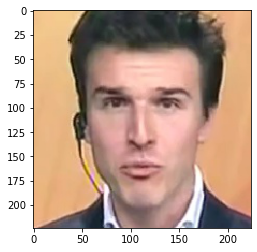

In [8]:
# teste
# Rendering image X with label y for MesoNet
X, y = generator.next()
# Evaluating prediction
#print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
#face = cv2.resize(X[0], (224, 224))
face2 = X[0]/255
pred = model.predict(np.expand_dims(face2, axis=0))[0]
print(f"Actual label: {int(y[0])}")
print("predição:", pred)
print(f"\nCorrect prediction: {round(pred[1])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

In [9]:
test_x =[]
test_y = []
test_pred = []
test_pred_label = []
for i in range(len(generator.labels)):  
#for i in range(5000):  
    # Loading next picture, generating prediction
    try:
        # Rendering image X with label y for MesoNet
        X, y = generator.next()
        # Evaluating prediction
        #print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
        face2 = X[0]/255
        pred = model.predict(np.expand_dims(face2, axis=0))[0]
        test_x.append(X)
        test_y.append(round(y[0]))
        test_pred.append(pred[1])
        test_pred_label.append(round(pred[1]))
    except:
        pass

resultados = pd.DataFrame(data = {"test_x" : test_x, "test_y" : test_y, "test_pred": test_pred, "test_pred_label": test_pred_label})

In [ ]:
previsoes = resultados['test_pred_label']
y = resultados['test_y']
prob_previsao = resultados['test_pred']
processamento = 'EfficientNetV2B0_'+dataset
with mlflow.start_run(run_name=processamento): 
    report = classification_report(y, previsoes, output_dict=True)
    acuracia = accuracy_score(y, previsoes)
    mlflow.log_metric('accuracy', acuracia)
    mlflow.log_metric('precision_0', report['0']['precision'])
    mlflow.log_metric('recall_0', report['0']['recall'])
    mlflow.log_metric('f1-score_0', report['0']['f1-score'])
    mlflow.log_metric('precision_1', report['1']['precision'])
    mlflow.log_metric('recall_1', report['1']['recall'])
    mlflow.log_metric('f1-score_1', report['1']['f1-score'])
    auc = roc_auc_score(y, prob_previsao)
    mlflow.log_metric('roc_auc',auc)
    matriz_confusao = confusion_matrix(y,previsoes)
    mlflow.log_metric('0_True_matrix' ,matriz_confusao[0][0])
    mlflow.log_metric('0_False_matrix', matriz_confusao[0][1])
    mlflow.log_metric('1_False_matrix',matriz_confusao[1][0])
    mlflow.log_metric('1_True_matrix',matriz_confusao[1][1])

### dfdc

In [11]:
# dataframe
dataset = 'dfdc'
dataframe_faces= pd.read_csv('../data/processed/dataset_'+dataset+'/metadados_faces.csv', sep=';', dtype=str)
dataframe_faces_teste = dataframe_faces[dataframe_faces['particao']=='teste'].reset_index(drop=True)
# Preparação da imagem

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_dataframe(
    dataframe_faces_teste,
    x_col='face',
    y_col='label',
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary')

Found 1220 validated image filenames belonging to 2 classes.


Actual label: 1
predição: [0.72671306 0.27328697]

Correct prediction: False


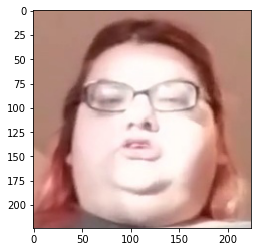

In [12]:
# teste
# Rendering image X with label y for MesoNet
X, y = generator.next()
# Evaluating prediction
#print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
#face = cv2.resize(X[0], (224, 224))
face2 = X[0]/255
pred = model.predict(np.expand_dims(face2, axis=0))[0]
print(f"Actual label: {int(y[0])}")
print("predição:", pred)
print(f"\nCorrect prediction: {round(pred[1])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

In [13]:
test_x =[]
test_y = []
test_pred = []
test_pred_label = []
for i in range(len(generator.labels)):  
#for i in range(5000):  
    # Loading next picture, generating prediction
    try:
        # Rendering image X with label y for MesoNet
        X, y = generator.next()
        # Evaluating prediction
        #print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
        face2 = X[0]/255
        pred = model.predict(np.expand_dims(face2, axis=0))[0]
        test_x.append(X)
        test_y.append(round(y[0]))
        test_pred.append(pred[1])
        test_pred_label.append(round(pred[1]))
    except:
        pass

resultados = pd.DataFrame(data = {"test_x" : test_x, "test_y" : test_y, "test_pred": test_pred, "test_pred_label": test_pred_label})

In [ ]:
previsoes = resultados['test_pred_label']
y = resultados['test_y']
prob_previsao = resultados['test_pred']
processamento = 'EfficientNetV2B0_'+dataset
with mlflow.start_run(run_name=processamento): 
    report = classification_report(y, previsoes, output_dict=True)
    acuracia = accuracy_score(y, previsoes)
    mlflow.log_metric('accuracy', acuracia)
    mlflow.log_metric('precision_0', report['0']['precision'])
    mlflow.log_metric('recall_0', report['0']['recall'])
    mlflow.log_metric('f1-score_0', report['0']['f1-score'])
    mlflow.log_metric('precision_1', report['1']['precision'])
    mlflow.log_metric('recall_1', report['1']['recall'])
    mlflow.log_metric('f1-score_1', report['1']['f1-score'])
    auc = roc_auc_score(y, prob_previsao)
    mlflow.log_metric('roc_auc',auc)
    matriz_confusao = confusion_matrix(y,previsoes)
    mlflow.log_metric('0_True_matrix' ,matriz_confusao[0][0])
    mlflow.log_metric('0_False_matrix', matriz_confusao[0][1])
    mlflow.log_metric('1_False_matrix',matriz_confusao[1][0])
    mlflow.log_metric('1_True_matrix',matriz_confusao[1][1])